# Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from scipy.io import mmread
import time
import sys
from metodos_interativos import (SOR, GradienteConjugadoNormal)
from T2 import (SOR_SparseMatrix, GradienteConjugadoNormalCOO, ProdutoVetorMatrizCOO, GeraVetor_b, OrdenaCOO)

## Matriz baixada

In [2]:
# Le o arquivo e ordena a representação COO da matriz esparsa por linha
sparse_matrix_coo = mmread("./Trefethen_20/Trefethen_20.mtx")
# Gera a forma completa da matriz esparsa
matriz = sparse_matrix_coo.toarray()
# Gera o vetor b com a matriz esparsa
b = GeraVetor_b(matriz)
# Gera um array de todas as posições "j" com elementos não nulos
rows, cols = OrdenaCOO(matriz)

In [17]:
# len(rows)

## Matriz dos slides para teste

In [16]:
# matriz_teste = np.array([(0.2,0.1,1,1,0),(0.1,4,-1,1,-1),(1,-1,60,0,-2),(1,1,0,8,4),(0,-1,-2,4,700)])
# b_teste = np.array([1,2,3,4,5])
# rows_teste, cols_teste = OrdenaCOO(matriz_teste)

# Trabalhando com a matriz esparsa sem formato COO

## Metodo SOR

In [3]:
tol_SOR = 10 ** (-3)
max_int = 300
w = 0.5
num_interacoes_SOR = []
ajustes_SOR = []
tempos_SOR = []
erros_SOR = []
while w <= 2.1:
    tempo_matriz_completa1 = time.time()
    sol_SOR, num_int_SOR = SOR(matriz, b, tol_SOR, max_int, w)
    tempo_matriz_completa2 = time.time()
    erro_SOR = (sol_SOR - np.ones(len(sol_SOR)))**(2)
    ajustes_SOR.append(w)
    num_interacoes_SOR.append(num_int_SOR)
    tempos_SOR.append(tempo_matriz_completa2 - tempo_matriz_completa1)
    erros_SOR.append(sum(erro_SOR))
    print("coeficiente de ajuste: ",w)
    w += 0.1

df_analise_SOR = pd.DataFrame({"coef_ajuste": ajustes_SOR, 
                               "num_interacoes": num_interacoes_SOR, 
                               "tempos": tempos_SOR, 
                               "erros": erros_SOR, 
                               "tolerancia": tol_SOR})

coeficiente de ajuste:  0.5
coeficiente de ajuste:  0.6
coeficiente de ajuste:  0.7
coeficiente de ajuste:  0.7999999999999999
coeficiente de ajuste:  0.8999999999999999
coeficiente de ajuste:  0.9999999999999999
coeficiente de ajuste:  1.0999999999999999
coeficiente de ajuste:  1.2
coeficiente de ajuste:  1.3
coeficiente de ajuste:  1.4000000000000001
coeficiente de ajuste:  1.5000000000000002
coeficiente de ajuste:  1.6000000000000003
coeficiente de ajuste:  1.7000000000000004
coeficiente de ajuste:  1.8000000000000005
coeficiente de ajuste:  1.9000000000000006
coeficiente de ajuste:  2.0000000000000004


## Metodo do conjugado gradiente

In [4]:
num_interacoes_gradConjugado = []
erros_gradienteConjugado = []
tempos_gradConjugado = []
tolerancias_gradConjugado = []
i = -1
while i >= -10:
    tolerancia = 10 ** (i)
    tempo_gradConjugado1 = time.time()
    x, k = GradienteConjugadoNormal(matriz, b, len(matriz), tolerancia)
    tempo_gradConjugado2 = time.time()
    erro_SOR_COO = (x - np.ones(len(x)))**(2)
#     print("interacoes necessarias: ", k," - erro cometido: ", erro.dot(erro))
    print("tolerancia: ", i)
    num_interacoes_gradConjugado.append(k)
    erros_gradienteConjugado.append(sum(erro_SOR_COO))
    tempos_gradConjugado.append(tempo_gradConjugado2 - tempo_gradConjugado1)
    tolerancias_gradConjugado.append(i)
    i -= 1
    
df_analise_gradienteConjugado = pd.DataFrame({"num_interacoes": num_interacoes_gradConjugado, 
                                              "tempos": tempos_gradConjugado, 
                                              "erro": erros_gradienteConjugado, 
                                              "tolerancia": tolerancias_gradConjugado})

tolerancia:  -1
tolerancia:  -2
tolerancia:  -3
tolerancia:  -4
tolerancia:  -5
tolerancia:  -6
tolerancia:  -7
tolerancia:  -8
tolerancia:  -9
tolerancia:  -10


# Trabalhando com a matriz esparsa no formato COO

## Metodo SOR

In [5]:
tol_SOR_COO = -1
df_analise_SOR_COO = pd.DataFrame({"coef_ajuste": [], 
                                   "num_interacoes": [], 
                                   "tempos": [], 
                                   "erros": [],
                                   "tolerancia": []})
while tol_SOR_COO >= -10:
    print("tolerancia: ", tol_SOR_COO)
    max_int = 300
    w = 0.5
    num_interacoes_SOR_COO = []
    ajustes_SOR_COO = []
    tempos_SOR_COO = []
    erros_SOR_COO = []
    while w < 2.1:
        tempo_matriz_COO_1 = time.time()
        sol_SOR_COO, num_int_SOR_COO = SOR_SparseMatrix(matriz, b, rows, cols, w, 10**(tol_SOR_COO), max_int)
        tempo_matriz_COO_2 = time.time()
        erro_SOR_COO = (sol_SOR_COO - np.ones(len(sol_SOR_COO)))**(2)
        ajustes_SOR_COO.append(w)
        num_interacoes_SOR_COO.append(num_int_SOR_COO)
        tempos_SOR_COO.append(tempo_matriz_COO_2 - tempo_matriz_COO_1)
        erros_SOR_COO.append(sum(erro_SOR_COO))
        w += 0.1
    df_aux = pd.DataFrame({"coef_ajuste": ajustes_SOR_COO, 
                           "num_interacoes": num_interacoes_SOR_COO, 
                           "tempos": tempos_SOR_COO, 
                           "erros": erros_SOR_COO, 
                           "tolerancia": tol_SOR_COO})
    df_analise_SOR_COO = pd.concat([df_analise_SOR_COO, df_aux])
    tol_SOR_COO -= 1
    
df_analise_SOR_COO = df_analise_SOR_COO.reset_index()

tolerancia:  -1
tolerancia:  -2
tolerancia:  -3
tolerancia:  -4
tolerancia:  -5
tolerancia:  -6
tolerancia:  -7
tolerancia:  -8
tolerancia:  -9
tolerancia:  -10


In [31]:
# df_analise_COO

## Metodo do Gradiente Conjugado

### Matriz baixada

In [6]:
num_interacoes_gradConjugado_COO = []
erros_gradienteConjugado_COO = []
tempos_gradConjugado_COO = []
tolerancias_gradConjugado_COO = []
i = -1
while i >= -10:
    tolerancia_COO = 10 ** (i)
    tempo_gradConjugado_COO1 = time.time()
    x_COO, k_COO = GradienteConjugadoNormalCOO(matriz, rows, cols, b, len(matriz), tolerancia_COO)
    tempo_gradConjugado_COO2 = time.time()
    erro_GradConjugado_COO = (x_COO - np.ones(len(x_COO)))**(2)
#     print("interacoes necessarias: ", k," - erro cometido: ", erro.dot(erro))
    print("tolerancia: ", i)
    num_interacoes_gradConjugado_COO.append(k_COO)
    erros_gradienteConjugado_COO.append(sum(erro_GradConjugado_COO))
    tempos_gradConjugado_COO.append(tempo_gradConjugado_COO2 - tempo_gradConjugado_COO1)
    tolerancias_gradConjugado_COO.append(i)
    i -= 1
    
df_analise_gradienteConjugado_COO = pd.DataFrame({"num_interacoes": num_interacoes_gradConjugado_COO, 
                                                  "tempos": tempos_gradConjugado_COO, 
                                                  "erro": erros_gradienteConjugado_COO, 
                                                  "tolerancia": tolerancias_gradConjugado_COO})

tolerancia:  -1
tolerancia:  -2
tolerancia:  -3
tolerancia:  -4
tolerancia:  -5
tolerancia:  -6
tolerancia:  -7
tolerancia:  -8
tolerancia:  -9
tolerancia:  -10


### Matriz teste

In [272]:
# tolerancia = 10 ** (-10)
# x_teste, k_teste = GradienteConjugadoNormal(matriz_teste, rows_teste, cols_teste, b_teste, len(matriz_teste), tolerancia)
# print(k_teste)
# print(x_teste)
# print(max(x_teste - np.ones(len(x_teste))))
# if max(x_teste - np.ones(len(x_teste))) <= tolerancia: print(True)

# Analise resultados

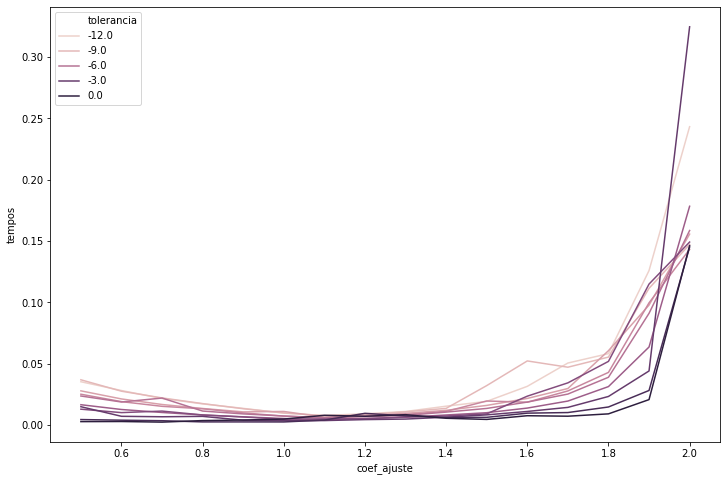

In [8]:
plt.pyplot.figure(figsize=(12,8))
sns.lineplot(x="coef_ajuste",y="tempos", data=df_analise_SOR_COO, hue="tolerancia", markers=True)

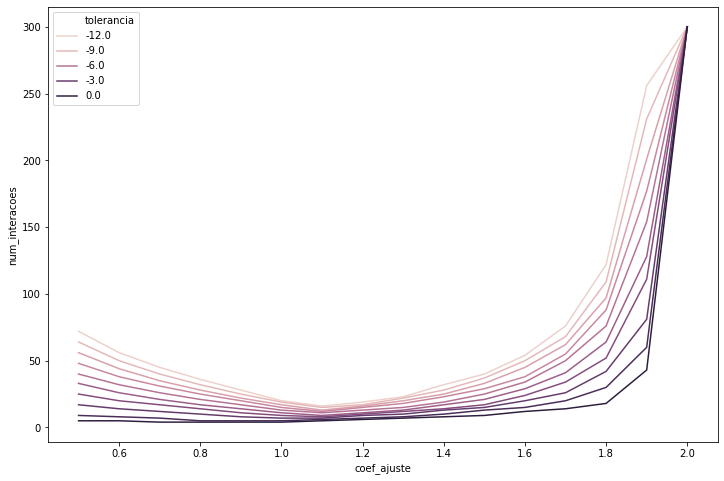

In [9]:
plt.pyplot.figure(figsize=(12,8))
sns.lineplot(x="coef_ajuste",y="num_interacoes", data=df_analise_SOR_COO, hue="tolerancia", markers=True)

In [24]:
df_analise_gradienteConjugado_COO

,num_interacoes,tempos,erro,tolerancia
0,12,0.022745,8.667292e-03,-1
1,18,0.027835,1.626809e-05,-2
2,19,0.012646,2.416801e-26,-3
3,19,0.012203,2.416801e-26,-4
4,19,0.012014,2.416801e-26,-5
5,19,0.011551,2.416801e-26,-6
6,19,0.011567,2.416801e-26,-7
7,19,0.011771,2.416801e-26,-8
8,19,0.011891,2.416801e-26,-9
9,19,0.011757,2.416801e-26,-10


In [11]:
df_analise

7

# Outros

In [325]:
# def SOR(C, A, b, w):
#     x0 = np.array([0.]*len(b))
#     max_iter = 15
#     n = len(b)
#     x = x0
#     EQMs = []
#     steplist = []
#     step = 1
#     while step <= max_iter:
#         print(step)
#         ilist = []
#         for i in C["row"]:
#             if i in ilist: continue
#             else: ilist.append(i)
#             soma1 = 0
#             soma2 = 0
#             for k in range(len(C["row"])):
#                 if C["row"][k] == i:
#                     j = C["col"][k]
#                     if j < i:
#                         soma1 += A[i][j] * x[j]
#                     elif j > i:
#                         soma2 += A[i][j] * x0[j]
#                     else: continue
#             x[i] = ((1-w) * x0[i]) + (w * (b[i] - soma1 - soma2) / A[i][i])
#             print(step)
#             print(x)
#         for i in range(len(x)):
#             x0[i] = x[i]
#         EQ = 0
#         for k in range(len(x)):
#             EQ += (x[k] - 1)**2
#         EQMs.append(EQ / step)
#         steplist.append(step)
#         step += 1
#     return EQMs, steplist

In [326]:
# SOR(C,matriz_teste, b_teste, 1.25)